# 2. Finite difference approximation of the 1D wave equation
## Newmark solution for K=2

We compute the integral WRT x by Newmark and the integral WRT mu with Monte-Carlo, more precisely, we compute
1/N_M * 1/(N_h+1) * sum_i sum_j (u_FD(x_j, mu_i) - u_ex(x_j, mu_i))^2

All errors are around 0. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from functions import *

a = -1
b = 1


In [2]:
N_hs = np.array([19, 29, 39, 49, 59])
N_Ms = np.array([10, 100, 500, 1000])
K = 2
print(N_hs)
print(N_Ms)
PATH_SAVE = "./table convergence/Newmark_K=2"

[19 29 39 49 59]
[  10  100  500 1000]


# first with one parameter Mu (N_mu = 1)

In [3]:
N_mu = 1
trials = 1
err = np.zeros((len(N_hs), len(N_Ms)))

for l, N_h in enumerate(N_hs):
    h = 1/(N_h + 1)
    H = np.arange(1, N_h+1)*h
    for k, N_M in enumerate(N_Ms):
        print("N_h = ", N_h, "h = ", h, ", N_M = ", N_M)
        integral_trials = np.zeros(trials)
        for i in range(trials):
            Mus = np.random.uniform(low = -1, high = 1, size = (N_mu, N_M))
            I_Ns = np.zeros(N_M)
            for j in range(N_M):
                somme = fct(Mus[:,j], K = K)
                #Newmark sol:
                y_new, t = newmark(N_h, N_h, somme, h, h)
                #Exact sol: 
                uex = sol_given_fct2(somme)
                y_ex = (np.vectorize(uex))(H,t)
                #sum over x_j
                I_Ns[j] = h * np.sum((y_new-y_ex)**2)
            #approximation of the integral:
            integral_trials[i] = (b-a)**N_mu*np.mean(I_Ns) #(b-a) to the power N_mu because we integrate over a to b, N_mu times.
    #mean over N_trials:
        err[l, k] = np.mean(integral_trials)
    print("err : ", err[l])



N_h =  19 h =  0.05 , N_M =  10
N_h =  19 h =  0.05 , N_M =  100
N_h =  19 h =  0.05 , N_M =  500
N_h =  19 h =  0.05 , N_M =  1000
err :  [1.25962401e-31 1.30470912e-31 1.17030622e-31 1.24749768e-31]
N_h =  29 h =  0.03333333333333333 , N_M =  10
N_h =  29 h =  0.03333333333333333 , N_M =  100
N_h =  29 h =  0.03333333333333333 , N_M =  500
N_h =  29 h =  0.03333333333333333 , N_M =  1000
err :  [3.38923065e-31 2.67099062e-31 2.61380572e-31 2.75354601e-31]
N_h =  39 h =  0.025 , N_M =  10
N_h =  39 h =  0.025 , N_M =  100
N_h =  39 h =  0.025 , N_M =  500
N_h =  39 h =  0.025 , N_M =  1000
err :  [8.85308753e-31 5.80214971e-31 5.45035632e-31 5.08544968e-31]
N_h =  49 h =  0.02 , N_M =  10
N_h =  49 h =  0.02 , N_M =  100
N_h =  49 h =  0.02 , N_M =  500
N_h =  49 h =  0.02 , N_M =  1000
err :  [8.00568712e-31 8.07184753e-31 9.73279603e-31 9.09926780e-31]
N_h =  59 h =  0.016666666666666666 , N_M =  10
N_h =  59 h =  0.016666666666666666 , N_M =  100
N_h =  59 h =  0.016666666666666666

In [4]:
np.savetxt(PATH_SAVE + "/N_hs.dat", np.array(N_hs))
np.savetxt(PATH_SAVE + "/N_Ms.dat", np.array(N_Ms))
np.savetxt(PATH_SAVE + "/err_N_mu= " + str(N_mu) + ".dat", np.array(err))

\begin{tabular}{lll}
\toprule
    h &  N\_M &    Error \\
\midrule
0.050 &   10 & 1.26E-31 \\
0.050 &  100 & 1.30E-31 \\
0.050 &  500 & 1.17E-31 \\
0.050 & 1000 & 1.25E-31 \\
0.033 &   10 & 3.39E-31 \\
0.033 &  100 & 2.67E-31 \\
0.033 &  500 & 2.61E-31 \\
0.033 & 1000 & 2.75E-31 \\
0.025 &   10 & 8.85E-31 \\
0.025 &  100 & 5.80E-31 \\
0.025 &  500 & 5.45E-31 \\
0.025 & 1000 & 5.09E-31 \\
0.020 &   10 & 8.01E-31 \\
0.020 &  100 & 8.07E-31 \\
0.020 &  500 & 9.73E-31 \\
0.020 & 1000 & 9.10E-31 \\
0.017 &   10 & 1.14E-30 \\
0.017 &  100 & 1.57E-30 \\
0.017 &  500 & 1.55E-30 \\
0.017 & 1000 & 1.61E-30 \\
\bottomrule
\end{tabular}



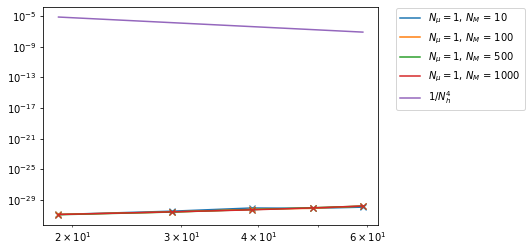

In [5]:
N_mu = 1
N_hs = np.genfromtxt(PATH_SAVE + "/N_hs.dat")
N_Ms = np.genfromtxt(PATH_SAVE + "/N_Ms.dat")
err = np.genfromtxt(PATH_SAVE + "/err_N_mu= " + str(N_mu) + ".dat")
hs = 1/(N_hs + 1)

#create data
latex = to_latex(N_hs, N_Ms, err)
print(latex)



legend = []
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
custom_lines = []

plt.yscale('log')
plt.xscale('log')

for i in range(len(N_Ms)):
    plt.plot(N_hs, err[:, i], '-x', color = colors[i])
    plt.yscale('log')
    plt.xscale('log')
    custom_lines.append(Line2D([0], [0], color=colors[i]))
    legend.append(r"$N_\mu = $" + str(N_mu) + r", $N_M$ = " + str(int(N_Ms[i])))

plt.plot(N_hs, 1/N_hs**4, color = colors[i+1])
custom_lines.append(Line2D([0], [0], color=colors[i+1]))
legend.append(r"$1/N_h^4$")
plt.legend(custom_lines, legend, bbox_to_anchor=(1.04,1.02))
plt.show()

# We verify that the convergence is respect for different number of parameters (vary N_mu)

In [7]:
N_mus = [1, 5, 10, 15, 20, 25]
trials = 1
for l, N_mu in enumerate(N_mus):
    print("N_mu : ", N_mu)
    err = np.zeros((len(N_hs), len(N_Ms)))
    for l, N_h in enumerate(N_hs):
        h = 1/(N_h + 1)
        H = np.arange(1, N_h+1)*h
        for k, N_M in enumerate(N_Ms):
            print("N_h = ", N_h, "h = ", h, ", N_M = ", N_M)
            integral_trials = np.zeros(trials)
            for i in range(trials):
                Mus = np.random.uniform(low = -1, high = 1, size = (int(N_mu), int(N_M)))
                I_Ns = np.zeros(int(N_M))
                for j in range(int(N_M)):
                    somme = fct(Mus[:,j], K)
                    #Newmark sol:
                    y_new, t = newmark(int(N_h), int(N_h), somme, h, h)
                    #Exact sol: 
                    uex = sol_given_fct2(somme)
                    y_ex = (np.vectorize(uex))(H,t)
                    #sum over x_j
                    I_Ns[j] = h * np.sum(((y_new-y_ex)**2))
                #approximation of the integral:
                integral_trials[i] = np.mean(I_Ns) #(b-a) to the power N_mu because we integrate over a to b, N_mu times.
        #mean over N_trials:
            err[l, k] = np.mean(integral_trials)
        print("err : ", err[l])

    np.savetxt(PATH_SAVE + "/err_N_mu= " + str(N_mu) + ".dat", np.array(err))
    

N_mu :  1
N_h =  19.0 h =  0.05 , N_M =  10.0
N_h =  19.0 h =  0.05 , N_M =  100.0
N_h =  19.0 h =  0.05 , N_M =  500.0
N_h =  19.0 h =  0.05 , N_M =  1000.0
err :  [6.18797830e-32 5.71768289e-32 6.55660946e-32 6.37832333e-32]
N_h =  29.0 h =  0.03333333333333333 , N_M =  10.0
N_h =  29.0 h =  0.03333333333333333 , N_M =  100.0
N_h =  29.0 h =  0.03333333333333333 , N_M =  500.0
N_h =  29.0 h =  0.03333333333333333 , N_M =  1000.0
err :  [1.65428892e-31 1.19794773e-31 1.32708368e-31 1.35644729e-31]
N_h =  39.0 h =  0.025 , N_M =  10.0
N_h =  39.0 h =  0.025 , N_M =  100.0
N_h =  39.0 h =  0.025 , N_M =  500.0
N_h =  39.0 h =  0.025 , N_M =  1000.0
err :  [2.81018225e-31 3.07954176e-31 2.33073597e-31 2.63711272e-31]
N_h =  49.0 h =  0.02 , N_M =  10.0
N_h =  49.0 h =  0.02 , N_M =  100.0
N_h =  49.0 h =  0.02 , N_M =  500.0
N_h =  49.0 h =  0.02 , N_M =  1000.0
err :  [2.27645390e-31 4.12287684e-31 4.92337869e-31 5.01486442e-31]
N_h =  59.0 h =  0.016666666666666666 , N_M =  10.0
N_h = 

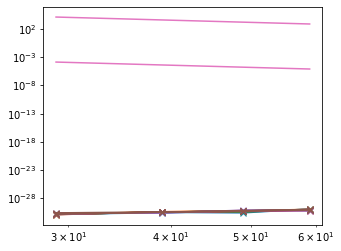

[2.58543198 2.46726527 2.48621666 2.28831371 2.34647865 2.40067973]


In [8]:
N_mus = [1, 5, 10, 15, 20, 25]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
legend = []
custom_lines = []
slopes_N_mu = np.zeros(len(N_mus))
fig = plt.figure(figsize=(5, 4))

for i, N_mu in enumerate(N_mus):
    err = np.genfromtxt(PATH_SAVE + "/err_N_mu= " + str(N_mu) + ".dat")
    slopes = np.zeros((len(N_Ms)-1))
    for j in range(len(N_Ms)):
        plt.plot(N_hs[1:], err[1:, j], '-x', color = colors[i])
        if j>0:
            slopes[j-1], _= np.polyfit(np.log(N_hs[1:]), np.log(err[1:, j]), 1)
        legend.append(r"$N_\mu = $" +  str(N_mu)+ r", $N_M$ = " + str(int(N_Ms[j])))
        custom_lines.append(Line2D([0], [0], color=colors[i]),)
    slopes_N_mu[i] = np.mean(slopes)   

plt.plot(N_hs[1:], 100*1/N_hs[1:]**4, color = colors[i+1])
plt.plot(N_hs[1:], 10000000000*1/N_hs[1:]**4, color = colors[i+1])
legend.append(r"$1/N_h^4$")
custom_lines.append(Line2D([0], [0], color=colors[i+1]))
#to have nice columns: add dummy plots and legends.
for i in range(4):
    legend.append("")
    custom_lines.append(Line2D([0], [0], color='w'))
    plt.plot(np.zeros(1), np.zeros([1,3]), color='w', alpha=0, label=' ')

plt.yscale('log')
plt.xscale('log')
#plt.legend(custom_lines, legend, bbox_to_anchor=(0.08,1.), ncol = 7)
plt.savefig(fname="./Figures/table convergence/K=" + str(K)  +"/Newmark_varying_N_mu")
plt.show()
print(slopes_N_mu)


Plot a Newmark approximation : 

integral : 4.240640946881442e-31


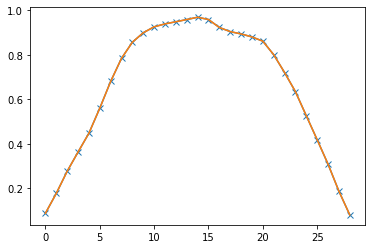

In [11]:
K=2
N_mu = 25
N_h = 29
h = 1/(N_h + 1)
H = np.arange(1, N_h+1)*h
Mus = np.random.uniform(low = -1, high = 1, size = (int(N_mu)))
somme = fct(Mus, K)
#Newmark sol:
y_new, t = newmark(int(N_h), int(N_h), somme, h, h)
#Exact sol: 
uex = sol_given_fct2(somme)
y_ex = (np.vectorize(uex))(H,t)

integral = h * np.sum((y_new-y_ex)**2)
print("integral :", integral)

plt.plot(y_new, '-x')
plt.plot(y_ex)